# Функции в Pandas
Примеры из презентации

In [3]:
import pandas as pd

In [11]:
adress = "F:\Program\git_base\GitHub\MyRepo\PYDA_07\Python_7_pandas_functions_groupby\\"

In [4]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,clicks,orders,user_id
0,163,2,1
1,130,4,2
2,97,0,3


In [5]:
def watcher(a):
    """Мне только посмотреть"""
    if a == 0:
        return True
    
    return False

Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [6]:
df['watcher'] = df['orders'].apply(watcher)
df

,clicks,orders,user_id,watcher
0,163,2,1,False
1,130,4,2,False
2,97,0,3,True


In [7]:
def conversion(a):
    """Подсчет конверсии переходов в покупки"""
    return a['orders'] / a['clicks']

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [14]:
df['conversion'] = df.apply(conversion, axis=1)
df

,clicks,orders,user_id,watcher,conversion
0,163,2,1,False,0.012270
1,130,4,2,False,0.030769
2,97,0,3,True,0.000000


In [17]:
def metriks(row):
    return pd.Series({'col_1':1, 'col_2':2})

In [ ]:
df

### Анализ рекламных кампаний

In [18]:
stats = pd.read_excel('F:\\Program\\git_base\\GitHub\\MyRepo\\PYDA_07\\Python_7_pandas_functions_groupby\\ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [19]:
# можно через stats.rename
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [22]:
stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [23]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [24]:
stats['word_count'].value_counts()

3     1129
4      529
2      189
5      137
6       84
7       38
8       30
9       12
10       6
12       2
21       1
17       1
11       1
Name: word_count, dtype: int64

In [7]:
%matplotlib inline

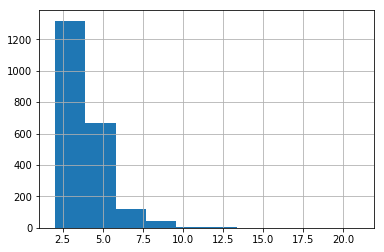

In [8]:
stats['word_count'].hist()

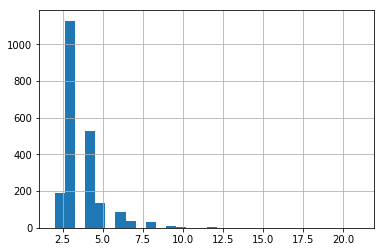

In [9]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [34]:
stats['word_count'].value_counts().head()

3    1129
4     529
2     189
5     137
6      84
Name: word_count, dtype: int64

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [35]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [36]:
from urllib import parse # библиотека для работы со ссылками

In [38]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='')

In [40]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal').netloc

'ya.ru'

In [42]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [43]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [44]:
# как доставать значения
parsed.netloc

'awesome-site.ru'

In [45]:
params = parse.parse_qs(parsed.query)
params

{'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}'],
 'utm_medium': ['cpc'],
 'utm_source': ['yandex']}

In [48]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [49]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [50]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [51]:
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [52]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


In [53]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [54]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в названии группы есть слово 'мрт') круглосуточно (в тексте объявления есть '24 часа'). Выделите строки, в которых не упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [83]:
def filter ():
    if stats[stats['text'].str.contains('24 часа', case=False) ] == True:
        return 1
    else:
        return 0
    


In [84]:
def words_search(words):
    if 'МРТ' in words and '24 часа' not in words:
        return 'МРТ'
    elif 'МРТ' not in words and '24 часа' in words:
        return 'круглосуточно'
    elif 'МРТ' in words and '24 часа' in words:
        return 'оба'
    else:
        return 'ничего'
stats['result'] = stats['text'].apply(words_search)
stats['result'].value_counts().head()

оба              2090
круглосуточно      69
Name: result, dtype: int64

In [86]:
def mrt_24(df, v1, v2):
    if v1 not in df['title'] and v2 in df['text']:
        return True
    return False

stats['has_mrt24'] = stats.apply(mrt_24, v1='МРТ', v2 = '24 часа', axis=1)
stats['has_mrt24'].value_counts()

False    2123
True       36
Name: has_mrt24, dtype: int64

In [87]:
def none_mri_24 (a):
    list_group = a.group.split(' ')
    list_text = a.text.split(' ')
    for word in list_group:
        if word == 'мрт':
            return False
    for word in list_text:
        if word == '24':
            return False
    return True
stats['result'] = stats.apply(none_mri_24, axis=1)
stats.head()     

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up,result,has_mrt24
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125,False,False
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125,False,False
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224,False,False
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000,False,False
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000,False,False


In [88]:
def have_word(row, w, w2):
    if (w not in row['title'].lower()) & (w2 in row['text'].lower()):
        return True
    return False

stats['have_word'] = stats.apply(have_word, w='мрт', w2='24', axis=1)
stats['have_word'].value_counts()

False    2123
True       36
Name: have_word, dtype: int64

In [89]:
# Допилить самому решение этой задачи. Выше указаны примеры решения от группы.

# Группировки

In [92]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,amount,category,country,order_id
0,100,Электроника,Россия,1
1,80,Авто,Китай,2
2,90,Электроника,Китай,3
3,140,Авто,Россия,4
4,90,Авто,Россия,5


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [100]:
df_russia = df[df['country']=='Россия']
df_china = df[df['country']=='Китай']

In [101]:
df_russia

,amount,category,country,order_id
0,100,Электроника,Россия,1
3,140,Авто,Россия,4
4,90,Авто,Россия,5


In [102]:
df_china

,amount,category,country,order_id
1,80,Авто,Китай,2
2,90,Электроника,Китай,3


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [112]:
df_russia['amount'].mean(), df_russia['amount'].max() - df_russia['amount'].min()

(110.0, 50)

In [113]:
df_china['amount'].mean(), df_china['amount'].max() - df_china['amount'].min()

(85.0, 10)

Объединим процесс разбиения на датафреймы

In [117]:
def groupby_function(data):
    return data.amount.mean()

In [118]:
# Функция выше принимает на вход датафрейм. Ниже - df.groupby('country') - сначала формирует датафрейм по каждой стране
# и потом считаем метрику по новому датафрейму
df.groupby('country').apply(groupby_function)

country
Китай      85.0
Россия    110.0
dtype: float64

In [ ]:
def groupby_function(data):
    return data.amount.mean()

Вернемся к статистике рекламных кампаний

In [120]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [121]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up,result,has_mrt24,have_word
campaign,,,,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2,2,2,2


In [122]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


In [123]:
stats.index.values

array([   0,    1,    2, ..., 2156, 2157, 2158], dtype=int64)

### Как вернуть столбец из индекса

In [124]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up,result,has_mrt24,have_word
0,034ada41b6,3,3,3,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2,2,2,2


In [30]:
# тоже самое, что с value_counts

stats.groupby('campaign').count().reset_index().sort_values('group', ascending=False).head() 

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
62,7f35591a28,456,456,456,456,456,456,456,456,456
69,8e77a0e565,348,348,348,348,348,348,348,348,348
22,2cc2e7d770,240,240,240,240,240,240,240,240,240
110,f6d2ae1e3d,220,220,220,220,220,220,220,220,220
105,e90f4db55a,218,218,218,218,218,218,218,218,218


In [125]:
# но теперь можно менять функции ура

stats.groupby('campaign').sum().sort_values('effect').head()

,effect,ad_id,word_count,power_up,result,has_mrt24,have_word
campaign,,,,,,,
63153306ff,2.8,2428554756,4,21.952,0.0,0.0,0.0
f80e902d76,3.3,2101705003,2,35.937,0.0,0.0,0.0
5a7508fa8d,3.5,2428554764,4,42.875,0.0,0.0,0.0
d5b16c7769,3.6,3401169381,4,46.656,0.0,0.0,0.0
7b17b2d188,5.8,2101705006,2,195.112,0.0,0.0,0.0


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [126]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [127]:
# разные метрики для разных столбцов

stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'}).head()

effect         power_up
              min  max        mean
campaign                          
034ada41b6    4.1  9.0  470.682000
03fcaecd1d    4.0  6.5  169.312500
0697a81555    4.0  5.5  115.187500
08cdcb57a3    5.5  7.4  245.991333
0f0ba311fb    4.4  6.4  173.664000

In [128]:
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
10f0dbeae4    2.3
1176612405    6.1
11d5b8b473    4.9
172c17eaba    7.6
1849dc35cf    8.4
1a39ecc6ce    2.4
1a419ad286    4.3
1f39b7a501    2.9
218404d350    7.5
22797af531    5.4
23d6da5a5a    8.7
254567583a    6.3
2775b98c81    8.7
27d3cfb133    8.5
285b2840bb    8.7
28d8dca4df    8.4
2b6d8d8535    8.7
2cc2e7d770    8.1
2db1121377    2.2
3157b77d24    8.7
33e8b25a9e    6.7
3cba0fca70    8.7
3e3a02c7b5    8.7
3eb8e263e0    8.5
41af22f2cc    8.8
             ... 
a825749b87    7.4
acc3077e55    7.7
adbedfa534    8.3
b067aafafd    4.9
b0fb5bd15c    8.7
b3f52e6f64    7.5
bcc95186aa    8.7
bd64204705    7.1
be97523396    7.9
c0c9fe22b7    6.9
c189a246bd    8.5
c2e4dcddaf    6.9
d0712ff587    8.7
d5b16c7769    3.6
d920f4dfbb    4.8
d96029561c    7.7
da872d1fb4    6.6
e2a26d3100    4.3
e2e45b2b2a    3.8
e7b94d5bd9    8.1
e90f4db55a    7.9
eb577faed1    8.5
edb6a77e3b    8.7
f0079349af    7.5
f

In [129]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  result  has_mrt24  \
group                campaign                                              
1 5 москва мрт тесла 777160ba51           1         1       1          1   
                     8e77a0e565           1         1       1          1   
                     f0079349af           1         1       1          1   
1 градская мрт       7f35591a28           3         3       3          3   
1 мрт нагатинский    8e77a0e565           1         1       1          1   

                                 have_word  
group                campaign               
1 5 москва мрт тесла 777160ba51          1  
                     8e77a0e565          1  
                     f0079349af          1  
1 градская мрт       7f35591a28          3  
1 мрт нагатинский    8e77a0e565          1

In [36]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 

In [144]:
stats.groupby('campaign').min().sort_values('effect').head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up,result,has_mrt24,have_word
campaign,,,,,,,,,,,,
8e77a0e565,1 5 москва мрт тесла,"""!1 !мрт !нагатинский""",1.6,2101705401,МРТ центры в Москве. От 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,4.096,False,False,False
7f35591a28,1 градская мрт,"""!1 !градская !мрт""",1.7,2101705009,МРТ в Москве от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,4.913,False,False,False
be97523396,мрт в бабушкинском районе,"""!мрт !в !москве !метро !щелковская""",1.8,2101705493,МРТ у метро в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,3,5.832,False,False,False
d96029561c,круглосуточный мрт в москве,"""!круглосуточный !мрт !в !москве""",1.8,2428555742,МРТ круглосуточно. От 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,3,5.832,False,False,False
acc3077e55,алтуфьево бибирево мрт,"""!алтуфьево !бибирево !мрт""",1.9,2428554791,Томография в Москве. От 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,6.859,False,True,True


# Агрегированные группировки
Считаем метрики для пользователей, которые выставили 100 и более оценок

In [59]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Упражнение
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [ ]:
ratings.groupby('userId').count().head()

In [ ]:
ratings_filtered[.... > 100]

In [ ]:
ratings_filtered['userId'].tolist()

In [ ]:
ratings[ ratings['userId'].isin(...) ]